<a href="https://colab.research.google.com/github/Bibek0130/Stock-price-prediction-with-sentiment-analysis/blob/master/Sentiment_analysis_for_stock_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sentiment Analysis
It is also called opinion mining. This is where the text is used to make sentiment of the text. THe sentiment can be positive, negative and neutral.

The flow for sentiment Analysis is :

Datasets --> Cleaning and preprocessing --> Choosing algorithm --> constructing our model pipelines --> Evaluations --> predictions

1. Dataset
2. Data Preprocessing
    removing numbers, punctuation marks, special chars and whitespaces
3. Word Embeddings
    using tfidf to convert our text into numerical format.
4. Train models
    Train your models
5. Predictions
    perform predictions and evaluate how model performs

###Data
The data used for this project will be the stock news for nepse data.


In [ ]:
#downloading directly from kaggle using opendatasets
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/bibekmainali01/nepse-news-dataset-30k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:

In [ ]:
import pandas as pd
dataset = "/content/nepse-news-dataset-30k/nepse_news_dataset_30k.csv"
#dataset = "nepse_news_dataset_30k.csv"
df = pd.read_csv(dataset)
df.head()


,News,Label
0,Investor confidence soared as NEPSE climbed by...,Positive
1,A sharp decline in NEPSE saw the index losing ...,Negative
2,"NEPSE ended on a high note today, rising by 45...",Positive
3,A sharp decline in NEPSE saw the index losing ...,Negative
4,"NEPSE ended on a high note today, rising by 35...",Positive


In [ ]:
df.tail()

,News,Label
29995,The Nepal Stock Exchange (NEPSE) faced a downt...,Negative
29996,"The Nepal Stock Exchange (NEPSE) surged today,...",Positive
29997,The Nepal Stock Exchange (NEPSE) faced a downt...,Negative
29998,"The Nepal Stock Exchange (NEPSE) surged today,...",Positive
29999,"NEPSE saw a bearish trend today, falling by 23...",Negative


In [ ]:
#see how oour data looks
df.shape


(30000, 2)

In [ ]:
#checking for any null values
df.isnull().values.any()
#now we know that we donot have any null values, so we are good to go.

False

<Axes: xlabel='News', ylabel='count'>

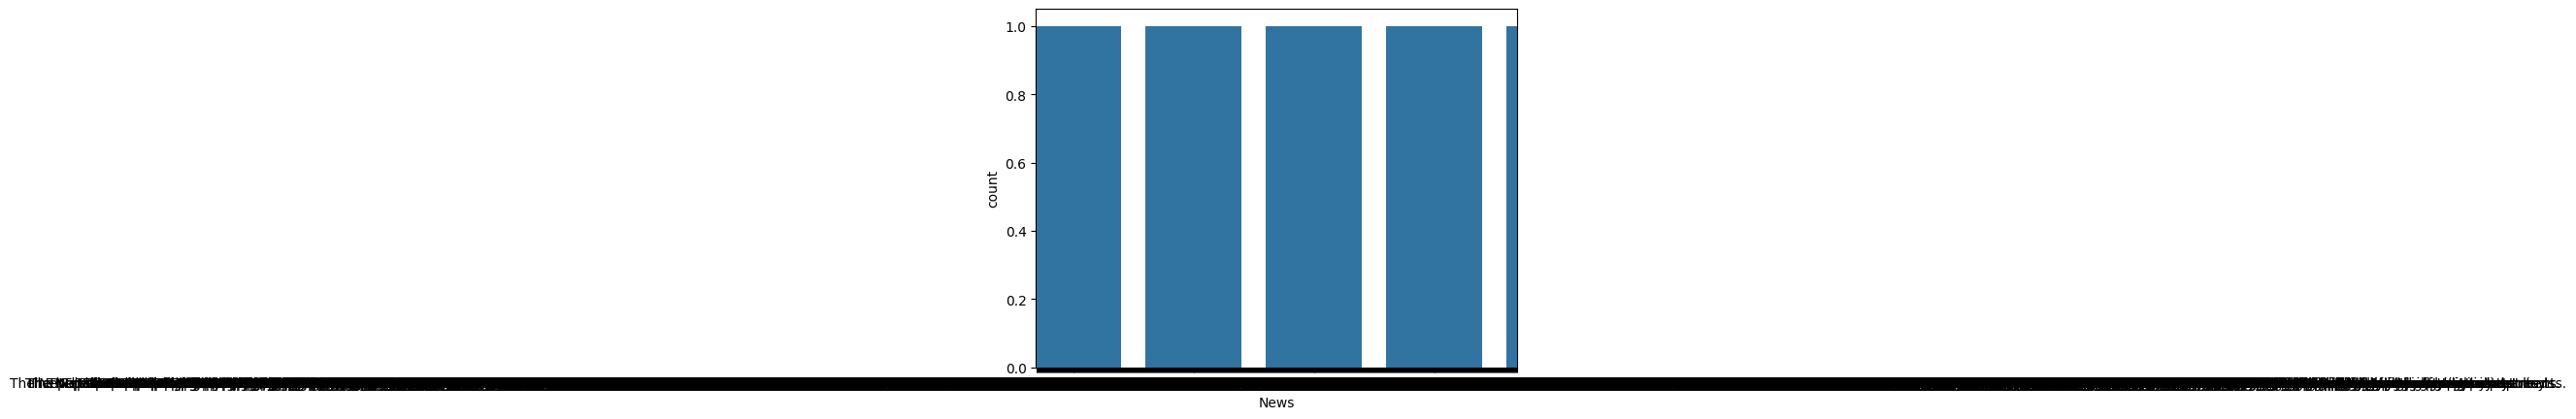

In [ ]:
#observing the distriburtion of sentiment in our datasets
import seaborn as sns
df_sample = df.sample(500)  # Take a random sample of 500
sns.countplot(x='News', data=df_sample)
#from the plot we know our data set is uniform.

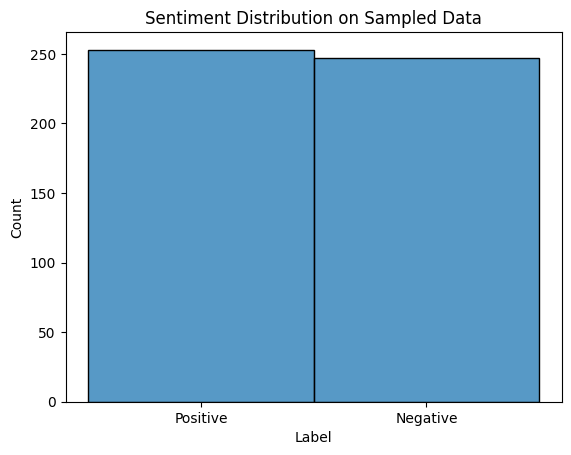

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sample = df.sample(500)  # Take a random sample of 500 rows
sns.histplot(df_sample['Label'], bins=3, kde=False)
plt.title('Sentiment Distribution on Sampled Data')
plt.show()

##Data Preprocessing

To prepare our model for training, we need to do the following data preprocessing techniques:

1. Data cleaning:
    1. remove unwanted characters
    2. Handle missing values
    3. remove duplicates
2. Encode labels
    convert labels into numerical formats.
    categorical elements like postive into 1 and negative into 0.
4. split the dataset
    split the dataset into trainig and test (80, 20)
5. Tokenization
    change words into numerical indices using tokenizer.
    Because we are using sequential model, tokenizer is used. If we use non-sequential modedl lilke Logistic Regression, NB, SVMm etc we use Vectirization to convert the dataset into numerical formats.







#Data cleaning

1. In cleaning the text, we do the following tasks.
  1. Lower casing
  2. removing HTML tags
  3. removing multiple white spaces
  4. convert to lower case
  5. removing punctuation and numbers
  6. removing single characters
  7. removing stopwords


In [ ]:
import re
#downloadinfgthe stoip words from nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def clean_text(text):
  #re.sub(pattern, replacement, string)
  #text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
  text = text.lower()  # Convert to lowercase
  #removing puctiation and numbers
  text = re.sub('[^a-zA-Z]',' ',text)
  #removing single characters
  text = re.sub(r"\s+[a-zA-Z]\s+",' ',text)
  #remove stopwords
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('',text)
  text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
  return text

df['News'] = df['News'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Handle missing values

In [ ]:
df.head()

,News,Label
0,investor confidence soared nepse climbed point...,Positive
1,sharp decline nepse saw index losing points en...,Negative
2,nepse ended high note today rising points bull...,Positive
3,sharp decline nepse saw index losing points en...,Negative
4,nepse ended high note today rising points bull...,Positive


# Encode labels
positive -> 1
Neagtive -> 0

In [ ]:

df['Label'].unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
print(df['Label'].isna())
#verifying that there is no null values in sentiment
print(df['Label'].isna().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: Label, Length: 30000, dtype: bool
0


In [ ]:
from sklearn import preprocessing
Le = preprocessing.LabelEncoder()
df['Label'] = Le.fit_transform(df['Label'])

In [ ]:
df['Label'].unique()
df['News'][0]

'investor confidence soared nepse climbed points reaching technology sector led rally himalayan distillery stocks gaining significantly market experts believe uptrend due strong earnings report'

In [ ]:
df.head()

,News,Label
0,investor confidence soared nepse climbed point...,1
1,sharp decline nepse saw index losing points en...,0
2,nepse ended high note today rising points bull...,1
3,sharp decline nepse saw index losing points en...,0
4,nepse ended high note today rising points bull...,1


# Split the datasets into training and testing
training -> 80%
testing -> 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['News'], df['Label'], test_size = 0.2, random_state = 42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(24000,)
(6000,)


#Tfidf Vectorization of the text
converts the text into numeri9cal fromat

In [ ]:
#convert sparse matrix into a dense array
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000) #tfidf vectorization with reduced features
tf_x_train = tfidf.fit_transform(X_train)
tf_x_test = tfidf.transform(X_test)


In [ ]:
print(tf_x_train.shape)

(24000, 108)


In [ ]:
print(tfidf.vocabulary_)
sum = 0
for i in tfidf.vocabulary_.items():
  print(i)
  sum += 1
print(sum)


{'nepse': 68, 'saw': 86, 'bearish': 5, 'trend': 102, 'today': 101, 'falling': 33, 'points': 73, 'concerns': 14, 'political': 75, 'instability': 50, 'weighed': 107, 'heavily': 41, 'telecom': 100, 'sector': 87, 'dragging': 20, 'nepal': 67, 'stocks': 94, 'sharp': 89, 'decline': 16, 'index': 49, 'losing': 60, 'ending': 26, 'banking': 4, 'suffered': 96, 'shares': 88, 'plummeted': 72, 'investors': 55, 'reacted': 80, 'negatively': 66, 'weaker': 106, 'earnings': 24, 'report': 81, 'insurance': 51, 'sanima': 85, 'bank': 3, 'investor': 54, 'confidence': 15, 'soared': 92, 'climbed': 11, 'reaching': 79, 'led': 58, 'rally': 77, 'gaining': 37, 'significantly': 90, 'market': 63, 'experts': 30, 'believe': 7, 'uptrend': 105, 'due': 23, 'increase': 48, 'foreign': 35, 'investments': 53, 'stock': 93, 'exchange': 28, 'surged': 97, 'close': 12, 'rise': 83, 'driven': 21, 'strong': 95, 'performance': 71, 'energy': 27, 'major': 62, 'companies': 13, 'like': 59, 'reporting': 82, 'higherthanexpected': 44, 'analyst

#prepare data for BiLSTM.
  Since TF-IDF produces sparse vectors, convert them inot sequences and pad them to a fixed length.

#Model building
  we use bilstm model when building

In [ ]:
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input, Embedding, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer for sparse matrix compatibility
#model.add(Input(shape=(5000,)))  # Match the `max_features` in TF-IDF
model.add(Input(shape=(tf_x_train.shape[1],)))

# Add dense layers with LSTM-like architecture
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │          13,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,273 (87.00 KB)

 Trainable params: 22,273 (87.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train the model
history = model.fit(tf_x_train, y_train, batch_size=32, epochs=5, validation_data=(tf_x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(tf_x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 148s 194ms/step - accuracy: 0.9910 - loss: 0.0965 - val_accuracy: 1.0000 - val_loss: 1.2057e-05
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 13ms/step - accuracy: 1.0000 - loss: 3.6959e-05 - val_accuracy: 1.0000 - val_loss: 1.7874e-06
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 1.0000 - loss: 1.1205e-05 - val_accuracy: 1.0000 - val_loss: 4.8600e-07
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 4.9310e-06 - val_accuracy: 1.0000 - val_loss: 1.8342e-07
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 1.0000 - loss: 2.3178e-06 - val_accuracy: 1.0000 - val_loss: 7.7305e-08
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.6273e-08
Test Loss: 7.730483986279069e-08
Test Accuracy: 1.0


#predictions

In [ ]:
# Generate predictions (probabilities)
y_pred_prob = model.predict(tf_x_test)

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)


188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step


In [ ]:
input_News = ''' Kathmandu, Nepal – The Nepal Stock Exchange (NEPSE) index witnessed a significant surge today, gaining 45.32 points to close at 2,105.67, marking a 2.2% increase from the previous trading session. The rally was fueled by strong investor confidence, particularly in the banking and hydropower sectors.

The commercial banking sector saw a sharp rise, with stocks of Nabil Bank (NABIL) and Nepal Investment Bank (NIBL) increasing by 4.5% and 3.8%, respectively. Similarly, the hydropower sector benefitted from government announcements regarding new hydropower projects and favorable energy policies, pushing stocks of Butwal Power Company (BPCL) and Upper Tamakoshi Hydropower (UPPER) up by 5.1% and 6.3%, respectively.

Analysts attribute the bullish trend to positive economic indicators, an upcoming interest rate cut by Nepal Rastra Bank, and increased foreign investment inflows. However, experts caution that profit booking in the next few sessions could lead to minor corrections.
'''
# Preprocess the News
cleaned_News = clean_text(input_News)

# Transform using TF-IDF
transformed_News = tfidf.transform([cleaned_News])
# Predict sentiment
prediction = model.predict(transformed_News)
Labels = "Positive" if prediction[0] > 0.5 else "Negative"

print(f"Predicted Sentiment: {Labels}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Sentiment: Positive


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
#accuracy score of the predicteed values
print(accuracy_score(y_test, y_pred))

#roc_auc_score
print(roc_auc_score(y_test, y_pred))

1.0
1.0


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Print a few sample predictions
print("First 10 Test Labels: ", y_test[:10].tolist())
print("First 10 Predictions: ", y_pred[:10].tolist())

# Check class distribution
unique, counts = np.unique(y_test, return_counts=True)
print("Class Distribution in Test Set:", dict(zip(unique, counts)))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


First 10 Test Labels:  [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
First 10 Predictions:  [[1], [1], [0], [1], [1], [0], [1], [1], [0], [0]]
Class Distribution in Test Set: {0: 2987, 1: 3013}
Confusion Matrix:
 [[2987    0]
 [   0 3013]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2987
           1       1.00      1.00      1.00      3013

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

